In [20]:
import torch
import sys
import os
import subprocess
sys.path.append(os.path.abspath("..")) 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

from dataloader.dataloader import load_MNIST_data
from train.training import train_and_classifier
from train.evaluate import plot_loss_curve,plot_errorbar_losscurve,plot_confusion_matrix,plot_histograms,create_table,save_csv,auto_git_push
%load_ext autoreload

Using device: cpu
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Already on 'experiment01'
1/3th Time Epoch: 1/3

M	experiment/test0527.ipynb
M	train/__pycache__/evaluate.cpython-311.pyc
M	train/evaluate.py


1/3th Time Epoch: 3/3

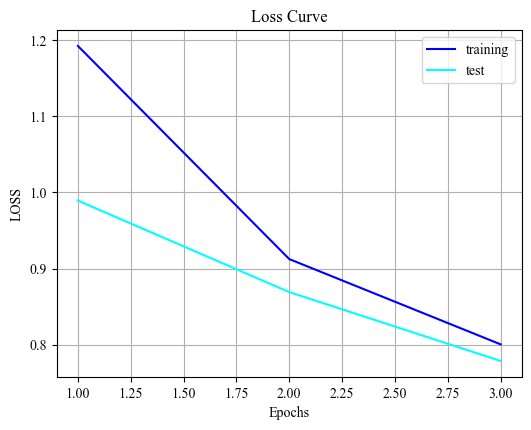

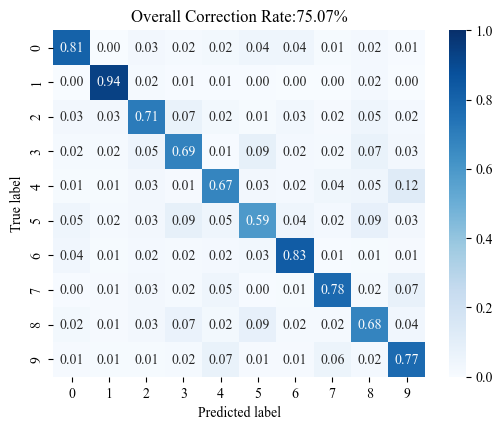

2/3th Time Epoch: 3/3

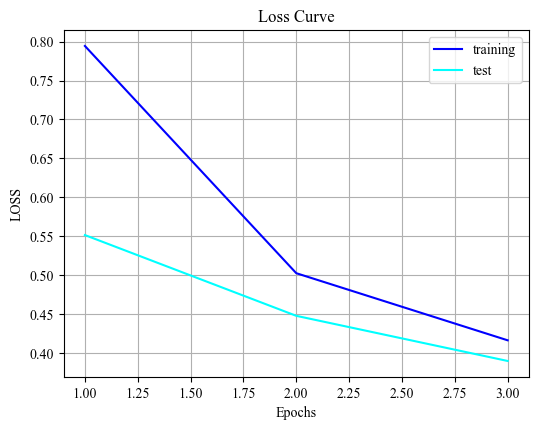

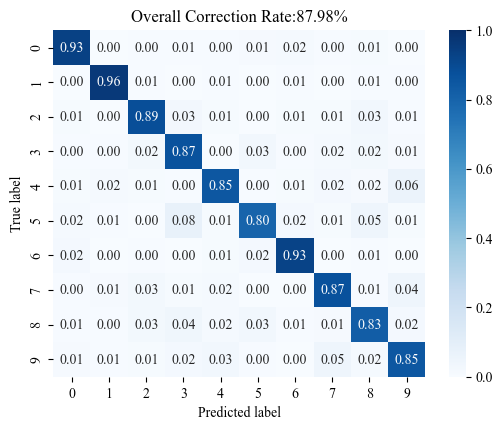

3/3th Time Epoch: 3/3

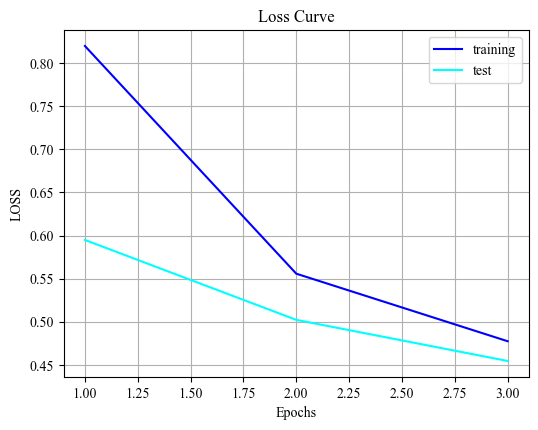

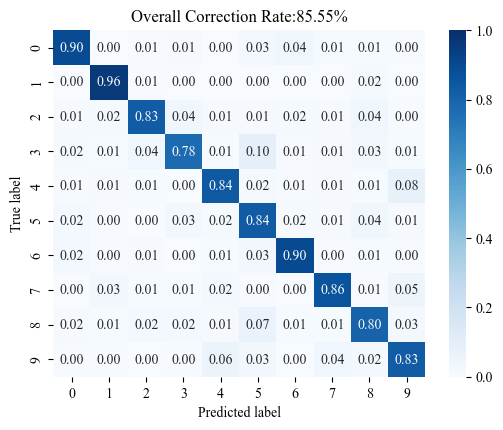

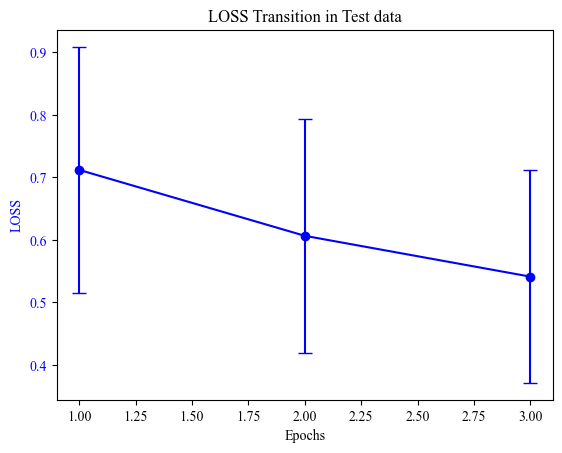

           Average  Best ID       Best  Worst ID      Worst
0   ACC  82.866667        2  87.980000         1  75.070000
1  LOSS   0.541154        2   0.389957         1   0.778844
2  TIME  16.773073        2  16.628758         3  16.862951
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST/PM_MLP_5281700.csv


In [21]:
branch_name = 'experiment01'
subprocess.run(["git", "checkout", branch_name],check=True)
%autoreload 2
#data---------------------------------------------
dataset = 'mnist'
data_train,data_test = load_MNIST_data()
batch_size = 64
#Encoder_Model------------------------------------
enc_type = 'PM'
cls_type = 'MLP'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 3
max_epochs = 3
leverage = 8
kernel_size =4
#save---------------------------------------------
folder = 'Class_MNIST'
ex_name='PM_MLP'

All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_and_classifier(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

    All_loss_test.append(loss_test_)
    All_pro_time.append(sum(pro_time_))
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)


In [22]:
auto_git_push(branch_name=branch_name)

[experiment01 14540be] 5281700_Auto commit
 1 file changed, 138 insertions(+), 24 deletions(-)
✅ Git push 完了！


remote: 
remote: Create a pull request for 'experiment01' on GitHub by visiting:        
remote:      https://github.com/Ryuichi-K-create/PhotonicEncoder/pull/new/experiment01        
remote: 
To https://github.com/Ryuichi-K-create/PhotonicEncoder.git
 * [new branch]      experiment01 -> experiment01
